In [5]:
import pandas as pd
df = pd.read_csv('data/nyc-rolling-sales.csv')

df.columns = df.columns.map(lambda x: x.replace(' ', '_'))
except_list = ['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'TAX_CLASS_AT_PRESENT', 'TAX_CLASS_AT_TIME_OF_SALE', 
               'BUILDING_CLASS_AT_TIME_OF_SALE','SALE_DATE']
for item in df.columns:
    if item not in except_list:
        df[item] = pd.to_numeric(df[item],errors='coerce')
        
df

,Unnamed:_0,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,...,RESIDENTIAL_UNITS,COMMERCIAL_UNITS,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,NaN,NaN,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,NaN,NaN,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,NaN,NaN,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,NaN,NaN,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,NaN,NaN,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17 00:00:00
5,9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,NaN,NaN,NaN,...,20,0,20,2581.0,9730.0,1900,2,C4,NaN,2017-07-20 00:00:00
6,10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,NaN,NaN,NaN,...,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23 00:00:00
7,11,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,NaN,NaN,NaN,...,44,2,46,5163.0,21007.0,1900,2,C7,NaN,2017-07-20 00:00:00
8,12,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,NaN,NaN,NaN,...,15,0,15,1534.0,9198.0,1920,2,D5,NaN,2017-06-20 00:00:00
9,13,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,NaN,NaN,NaN,...,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07 00:00:00


In [6]:
df = df.query("SALE_PRICE > 1000")
df = df.drop('EASE-MENT',1)
df_bonus = df
df = df.drop('ADDRESS',1)
df.columns

Index(['Unnamed:_0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS',
       'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DATE'],
      dtype='object')

In [7]:
import numpy as np
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='median', axis=0)

imp.fit([df['YEAR_BUILT']])
df['YEAR_BUILT'] = imp.transform([df['YEAR_BUILT']])[0]
#print(df['YEAR_BUILT'])
def convert_timedate_series(series):
      data = pd.DataFrame({ \
          'SALE MONTH': pd.to_datetime(series).dt.month, \
          'SALE DAY': pd.to_datetime(series).dt.day, \
          'SALE YEAR': pd.to_datetime(series).dt.year })

      return \
          data.columns, data
    
columns, data = convert_timedate_series(df['SALE_DATE'])
df[columns] = data
df.columns = df.columns.map(lambda x: x.replace(' ', '_'))
df = df.drop('SALE_DATE',1)
print(df.columns)

Index(['Unnamed:_0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS',
       'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DAY', 'SALE_MONTH', 'SALE_YEAR'],
      dtype='object')


In [8]:
df.fillna(value=0,inplace=True)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df.columns = df.columns.map(lambda x: x.replace('_', ' '))
df.to_csv('data/nyc_data_clean_unscaled.csv')
df_clean = df
df_clean.columns = df_clean.columns.map(lambda x: x.replace(' ', '_'))

In [35]:
from sklearn.preprocessing import MinMaxScaler
df_bin = pd.get_dummies(df)
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_bin)
pd.DataFrame(df_scaled).to_csv('data/nyc_data_clean_scaled.csv')

In [10]:
print(df_clean.columns)
df_by_zip = df_clean.groupby(['ZIP_CODE'])
top_five = df_by_zip['TOTAL_UNITS'].sum().sort_values(ascending=False)[0:5]
print("Top 5 ZIP CODES with LARGEST total number of Property for sales - TOTAL_UNITS")
print(top_five)
zip_borough = []
for zip_code in top_five.keys():
    zip_borough.append(int(df_by_zip.get_group(zip_code)['BOROUGH'].mean()))

print ("ZIP CODE\tBOROUGH")
for i in range(5):
    print(str(top_five.keys()[i])+"\t\t"+str(zip_borough[i]))


Index(['Unnamed:_0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY',
       'TAX_CLASS_AT_PRESENT', 'BLOCK', 'LOT', 'BUILDING_CLASS_AT_PRESENT',
       'APARTMENT_NUMBER', 'ZIP_CODE', 'RESIDENTIAL_UNITS', 'COMMERCIAL_UNITS',
       'TOTAL_UNITS', 'LAND_SQUARE_FEET', 'GROSS_SQUARE_FEET', 'YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE', 'BUILDING_CLASS_AT_TIME_OF_SALE',
       'SALE_PRICE', 'SALE_DAY', 'SALE_MONTH', 'SALE_YEAR'],
      dtype='object')
Top 5 ZIP CODES with LARGEST total number of Property for sales - TOTAL_UNITS
ZIP_CODE
10037    4596
11432    2686
11005    1866
10016    1754
11369    1648
Name: TOTAL_UNITS, dtype: int64
ZIP CODE	BOROUGH
10037		1
11432		4
11005		4
10016		1
11369		4


In [11]:
build_br = df_clean.groupby(['BUILDING_CLASS_CATEGORY','BOROUGH'])['SALE_PRICE'].mean()
br = build_br.loc["21 OFFICE BUILDINGS",slice(None)].sort_values(ascending=False).index.get_level_values('BOROUGH')[0]
print("borough that has the highest **mean** sale price of _commercial_ office buildings is",br)

print("the **median sale price** of borough -",br,"is ",end ='')
print(df_clean.groupby(['BOROUGH'])['SALE_PRICE'].median()[br])

borough that has the highest **mean** sale price of _commercial_ office buildings is 1
the **median sale price** of borough - 1 is 1170000.0


In [12]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort",ascending=False)
print(so)

SALE_YEAR                  SALE_YEAR                    1.000000
SALE_MONTH                 SALE_MONTH                   1.000000
BOROUGH                    BOROUGH                      1.000000
BLOCK                      BLOCK                        1.000000
LOT                        LOT                          1.000000
APARTMENT_NUMBER           APARTMENT_NUMBER             1.000000
ZIP_CODE                   ZIP_CODE                     1.000000
RESIDENTIAL_UNITS          RESIDENTIAL_UNITS            1.000000
COMMERCIAL_UNITS           COMMERCIAL_UNITS             1.000000
LAND_SQUARE_FEET           LAND_SQUARE_FEET             1.000000
GROSS_SQUARE_FEET          GROSS_SQUARE_FEET            1.000000
YEAR_BUILT                 YEAR_BUILT                   1.000000
TAX_CLASS_AT_TIME_OF_SALE  TAX_CLASS_AT_TIME_OF_SALE    1.000000
SALE_PRICE                 SALE_PRICE                   1.000000
SALE_DAY                   SALE_DAY                     1.000000
TOTAL_UNITS              

In [13]:
df_filtered = df_clean.query('RESIDENTIAL_UNITS > 0 & COMMERCIAL_UNITS <= 0 & SALE_YEAR >= 2005')
build_br = df_filtered.groupby(['SALE_YEAR','BOROUGH'])['TOTAL_UNITS'].sum()
br = build_br.loc[2017,slice(None)].sort_values(ascending=False).index.get_level_values('BOROUGH')[0]
print("The borough has the largest number of new(er) properties sold is",br)
print("the mean price for each borough are")
print(df_filtered.groupby(['BOROUGH'])['SALE_PRICE'].mean())
print("the median price for each borough are")
print(df_filtered.groupby(['BOROUGH'])['SALE_PRICE'].median())

The borough has the largest number of new(er) properties sold is 3
the mean price for each borough are
BOROUGH
1    3.340895e+06
2    6.528299e+05
3    1.159217e+06
4    7.233673e+05
5    5.023717e+05
Name: SALE_PRICE, dtype: float64
the median price for each borough are
BOROUGH
1    1749048.0
2     450000.0
3     849000.0
4     620000.0
5     475000.0
Name: SALE_PRICE, dtype: float64


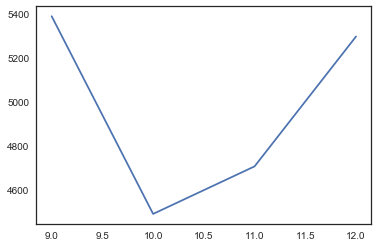

In [14]:
from matplotlib import pyplot as plt

month_year = df_clean.groupby(['SALE_MONTH','SALE_YEAR'])
d = month_year['TOTAL_UNITS'].count().loc[slice(None),2016]
plt.plot(d)
plt.show()

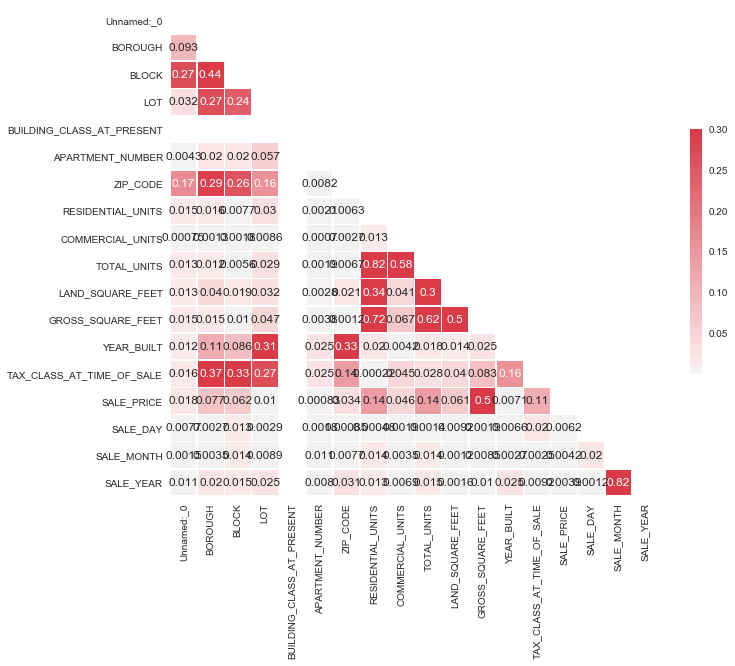

In [15]:
%matplotlib inline
import numpy as npa
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix before
###
corr = df_clean.corr().abs()
###

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,
           mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, annot=True,
           linewidths=.5, cbar_kws={"shrink": .5})


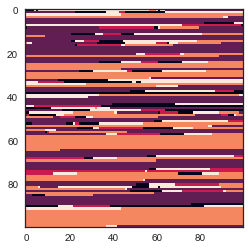

In [43]:
from sklearn.mixture import GaussianMixture
import cv2

gaussian = GaussianMixture(n_init=10,n_components=5)
fit = gaussian.fit(df_scaled[0:10000])
result = gaussian.predict(df_scaled[0:10000])
result = result.reshape(100,100)
plt.imshow(result)

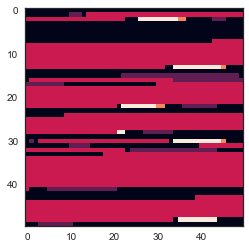

In [38]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=5,linkage='complete',affinity='cosine')
clustering.fit(df_scaled[0:10000])
result = clustering.fit_predict(df_scaled[0:10000])
result = result.reshape(100,100)
plt.imshow(result)